# Projeto:  Identificar fraudes nos e-mails da Enron

## Resumo do Projeto

Em 2000, Enron era uma das maiores empresas dos Estados Unidos. Já em 2002, ela colapsou e quebrou devido a uma fraude que envolveu grande parte da corporação. Resultando em uma investigação federal, muitos dados que são normalmente confidenciais, se tornaram públicos, incluindo dezenas de milhares de e-mails e detalhes financeiros para os executivos dos mais altos níveis da empresa. Neste projeto, você irá bancar o detetive, e colocar suas habilidades na construção de um modelo preditivo que visará determinar se um funcionário é ou não um funcionário de interesse (POI). Um funcionário de interesse é um funcionário que participou do escândalo da empresa Enron. Para te auxiliar neste trabalho de detetive, nós combinamos os dados financeiros e sobre e-mails dos funcionários investigados neste caso de fraude, o que significa que eles foram indiciados, fecharam acordos com o governo, ou testemunharam em troca de imunidade no processo.

## Objetivo do Projeto

O Objetivo deste projeto é utilizar o machine learning para identificar um POI (pessoa de interesse) baseado nos dados financeiros e email dos funcionários da Enron.

Esse projeto é dividio em quatro partes:
1. <b> Explorar o Dataset</b>
    Data Cleaning, Análise e remoção de Outlier
2. <b> Processamento de features</b>
    Envolve criação de features, feature scallig, feature selection e feature transform
3. <b> Escolha do Algoritmo </b>
    Escolher três algoritmos para testar 
4. <b> Validação </b>
    Ver qual dos algoritmos se sai melhor
    
    

In [1]:
# importando bibliotecas

import sys
import pickle
sys.path.append("../tools/")

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.grid_search import GridSearchCV
from time import time

import pandas as pd
from matplotlib import pyplot as plt

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

C:\Users\Fabio\Anaconda3\lib\site-packages\sklearn\grid_search.py:14: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, Sized
C:\Users\Fabio\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Fabio\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### 1.Explorando Dataset

In [3]:
#carregando os dados e transformando em um DataFrame

df_enron = pd.DataFrame.from_records(list(data_dict.values()))

#ajustando índice para nome dos funcionários:
employees = pd.Series(list(data_dict.keys()))
df_enron.set_index(employees, inplace=True)
df_enron.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
METTS MARK,600000,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299,29,38,1,...,NaN,1740,False,585062,NaN,365788,702,807,1061827,585062
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
ELLIOTT STEVEN,350000,NaN,-400729,NaN,steven.elliott@enron.com,4890344,78552,NaN,NaN,NaN,...,NaN,12961,False,1788391,NaN,170941,NaN,NaN,211725,6678735
CORDES WILLIAM R,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850,NaN,12,10,0,...,NaN,NaN,False,386335,NaN,NaN,58,764,NaN,1038185
HANNON KEVIN P,1500000,NaN,-3117011,NaN,kevin.hannon@enron.com,5538001,34039,32,32,21,...,1617011,11350,True,853064,NaN,243293,1035,1045,288682,6391065


In [4]:
df_enron.shape

(146, 21)

In [5]:
df_enron.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null bool
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receipt_with_poi      146 non-null object

Os tipos de dados estão todos em string. vamos converter em float e mudar o NaN para 0

In [6]:
df_enron_new = df_enron.apply(lambda x : pd.to_numeric(x, errors = 'coerce')).copy().fillna(0)
df_enron_new.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
METTS MARK,600000.0,0.0,0.0,0.0,0.0,0.0,94299.0,29.0,38.0,1.0,...,0.0,1740.0,False,585062.0,0.0,365788.0,702.0,807.0,1061827.0,585062.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,0.0,0.0,6680544.0,11200.0,0.0,0.0,0.0,...,1586055.0,2660303.0,False,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0
ELLIOTT STEVEN,350000.0,0.0,-400729.0,0.0,0.0,4890344.0,78552.0,0.0,0.0,0.0,...,0.0,12961.0,False,1788391.0,0.0,170941.0,0.0,0.0,211725.0,6678735.0
CORDES WILLIAM R,0.0,0.0,0.0,0.0,0.0,651850.0,0.0,12.0,10.0,0.0,...,0.0,0.0,False,386335.0,0.0,0.0,58.0,764.0,0.0,1038185.0
HANNON KEVIN P,1500000.0,0.0,-3117011.0,0.0,0.0,5538001.0,34039.0,32.0,32.0,21.0,...,1617011.0,11350.0,True,853064.0,0.0,243293.0,1035.0,1045.0,288682.0,6391065.0


In [7]:
df_enron_new.dtypes

bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                float64
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
poi                             bool
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
dtype: object

In [8]:
#quantidade de POI's e não-POI's.
poi_count = df_enron.groupby('poi').size()
print ("Número de POI'S : ", poi_count.iloc[1])
print ("Número de não-POI's : ",poi_count.iloc[0])


Número de POI'S :  18
Número de não-POI's :  128


In [9]:
# número de features
len(df_enron_new.columns)

21

### Investigação de Outliers

#### Financial Features: Bonus e Salário

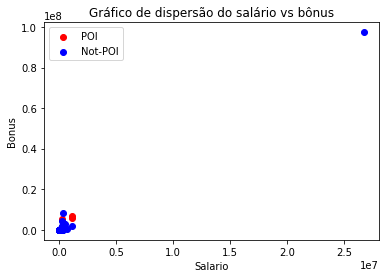

In [10]:
#vamos plotar um gráfico de dispersão

plt.scatter(df_enron_new['salary'][df_enron_new['poi'] == True],df_enron_new['bonus'][df_enron_new['poi'] == True], color = 'r',
           label = 'POI')
plt.scatter(df_enron_new['salary'][df_enron_new['poi'] == False],df_enron_new['bonus'][df_enron_new['poi'] == False],color = 'b',
           label = 'Not-POI')
    
plt.xlabel("Salario")
plt.ylabel("Bonus")
plt.title("Gráfico de dispersão do salário vs bônus")
plt.legend(loc='upper left')
plt.show()

No gráfico acima podemos observar um alto valor de salário e bônus, indicando um posível outlier. Vamos checar.

In [11]:
#checando o mais alto valor de salário de um não POI
(df_enron_new['salary'][df_enron_new['poi'] == False]).argmax()

C:\Users\Fabio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


'TOTAL'

In [12]:
#chcando o mais alto valor de bônus de um não POI
(df_enron_new['bonus'][df_enron_new['poi'] == False]).argmax()

C:\Users\Fabio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


'TOTAL'

#### Removendo Outlier

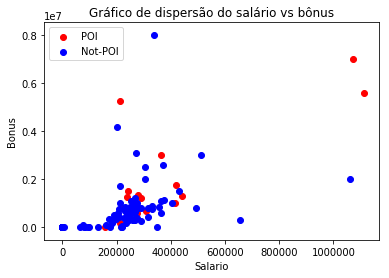

In [13]:
#deletando a linha 'total' do dataset
df_enron_new.drop('TOTAL', axis = 0, inplace = True)

#Plotando gráfico de dispersão novamente

plt.scatter(df_enron_new['salary'][df_enron_new['poi'] == True],df_enron_new['bonus'][df_enron_new['poi'] == True], color = 'r',
           label = 'POI')
plt.scatter(df_enron_new['salary'][df_enron_new['poi'] == False],df_enron_new['bonus'][df_enron_new['poi'] == False],color = 'b',
           label = 'Not-POI')
    
plt.xlabel("Salario")
plt.ylabel("Bonus")
plt.title("Gráfico de dispersão do salário vs bônus")
plt.legend(loc='upper left')
plt.show()

Após a remoção do outlier, os dados ficaram mais fáceis de compreender. Podemos observar que os valores de salário e bônus são maiores para os POI's do que os não-POI's.
Outro ponto interessante é que somente dois POI's possuem a combinação salário e bônus elevados.

#### Investigando dados de e-mails

Vamos checar a quantidade de e-mails enviados entre POI's e não-POI's. É comum esperarmos uma quantidade elevada de transações de e-mails entre os POI's

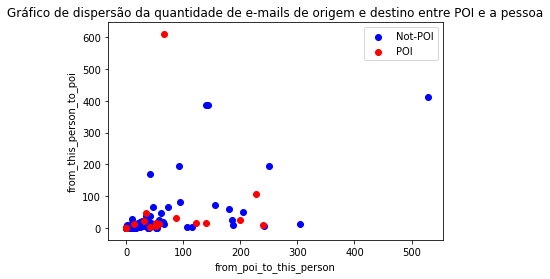

In [14]:
plt.scatter(df_enron_new['from_poi_to_this_person'][df_enron_new['poi'] == False],
            df_enron_new['from_this_person_to_poi'][df_enron_new['poi'] == False],
            color = 'b', label = 'Not-POI')

plt.scatter(df_enron_new['from_poi_to_this_person'][df_enron_new['poi'] == True],
            df_enron_new['from_this_person_to_poi'][df_enron_new['poi'] == True],
            color = 'r', label = 'POI')

    
plt.xlabel('from_poi_to_this_person')
plt.ylabel('from_this_person_to_poi')
plt.title("Gráfico de dispersão da quantidade de e-mails de origem e destino entre POI e a pessoa")
plt.legend(loc='upper right')
plt.show()

In [15]:
(df_enron_new['from_poi_to_this_person'][df_enron_new['poi'] == False]).argmax()

C:\Users\Fabio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


'LAVORATO JOHN J'

In [16]:
df_enron_new[df_enron_new.from_poi_to_this_person>500]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
LAVORATO JOHN J,8000000.0,0.0,0.0,0.0,0.0,4158995.0,49537.0,2585.0,528.0,411.0,...,2035380.0,1552.0,False,1008149.0,0.0,339288.0,3962.0,7259.0,10425757.0,5167144.0


Criando novas features: proporção de e-mails enviados de/para POI's

In [17]:
df_enron_new['fraction_mail_from_poi'] = df_enron_new['from_poi_to_this_person'].fillna(0.0)/df_enron_new['from_messages'].fillna(0.0) 
df_enron_new['fraction_mail_to_poi'] = df_enron_new['from_this_person_to_poi'].fillna(0.0)/df_enron_new['to_messages'].fillna(0.0)

In [18]:
df_enron_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 23 columns):
bonus                        145 non-null float64
deferral_payments            145 non-null float64
deferred_income              145 non-null float64
director_fees                145 non-null float64
email_address                145 non-null float64
exercised_stock_options      145 non-null float64
expenses                     145 non-null float64
from_messages                145 non-null float64
from_poi_to_this_person      145 non-null float64
from_this_person_to_poi      145 non-null float64
loan_advances                145 non-null float64
long_term_incentive          145 non-null float64
other                        145 non-null float64
poi                          145 non-null bool
restricted_stock             145 non-null float64
restricted_stock_deferred    145 non-null float64
salary                       145 non-null float64
shared_receipt_with_poi      145

In [19]:
#convertendo para umd icionário e armazenando
data_dict = df_enron_new.to_dict('index')
my_dataset = data_dict

In [20]:
my_dataset

{'METTS MARK': {'bonus': 600000.0,
  'deferral_payments': 0.0,
  'deferred_income': 0.0,
  'director_fees': 0.0,
  'email_address': 0.0,
  'exercised_stock_options': 0.0,
  'expenses': 94299.0,
  'from_messages': 29.0,
  'from_poi_to_this_person': 38.0,
  'from_this_person_to_poi': 1.0,
  'loan_advances': 0.0,
  'long_term_incentive': 0.0,
  'other': 1740.0,
  'poi': False,
  'restricted_stock': 585062.0,
  'restricted_stock_deferred': 0.0,
  'salary': 365788.0,
  'shared_receipt_with_poi': 702.0,
  'to_messages': 807.0,
  'total_payments': 1061827.0,
  'total_stock_value': 585062.0,
  'fraction_mail_from_poi': 1.3103448275862069,
  'fraction_mail_to_poi': 0.0012391573729863693},
 'BAXTER JOHN C': {'bonus': 1200000.0,
  'deferral_payments': 1295738.0,
  'deferred_income': -1386055.0,
  'director_fees': 0.0,
  'email_address': 0.0,
  'exercised_stock_options': 6680544.0,
  'expenses': 11200.0,
  'from_messages': 0.0,
  'from_poi_to_this_person': 0.0,
  'from_this_person_to_poi': 0.0,
  

### Features

Temos as seguintes features em nosso dataset

- 17 financial features : ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (todos em dólares americanos (USD))

- 6 Email features : ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (as unidades aqui são geralmente em número de emails; a exceção notável aqui é o atributo ‘email_address’, que é uma string)

- POI: [‘poi’] (atributo objetivo lógico (booleano), representado como um inteiro)

Vou inserir também as features que criamos ['fraction_mail_from_poi, 'fraction_mail_to_poi']

Vamos treinar nossos classificadores com a lista completa de features e depois vamos ver quais são as melhores features que devemos selecionar

In [21]:
features_list = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other',
                 'long_term_incentive', 'restricted_stock', 'director_fees', 'fraction_mail_from_poi',
                 'fraction_mail_to_poi', 'to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages',
                 'from_this_person_to_poi', 'shared_receipt_with_poi']

In [24]:
#extraindo features e labels do dataset:
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data


data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Seleção de Algoritmos

In [25]:
# importando bibliotecas para validação

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import scikitplot as skplt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import cross_validation

In [26]:
#dividindo os dados em treino e teste
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.3, 
                                                                                             random_state=42)

In [27]:
# Stratified ShuffleSplit cross-validator
sss = StratifiedShuffleSplit(n_splits=100, test_size=0.3,random_state = 42)

Utilizarei 3 cassificadores
- Naive Bayes
- Decision Tree
- K-means

In [28]:
#importando os classificadores
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Performance dos algoritmos: Precision, Accuracy e Recall

In [29]:
# Classificador 1: Gaussian Naive Bayes
    
clf = GaussianNB()
t0 = time()
clf.fit(features_train, labels_train)
print ("tempo de treinamento:", round(time()-t0, 3), "s")

t0 = time()
pred = clf.predict(features_test)
print ("tempo de previsão:", round(time()-t0, 3), "s")

#Acurácia
accuracy = accuracy_score(labels_test,pred)
#Precisão
#prec = precision_score(pred, labels_test)
#Recall
#recall_s = recall_score(pred,labels_test)
#f1-score
#f1 = f1_score(pred, labels_test)

print("Acurácia do classificador GaussianNB é: ", accuracy)
#print("A precisão do classificador GaussianNB é: ", prec)
#print("O recall do classificador GaussianNB é: ", recall_s)
#print("O f-1 score do classificador GaussianNB é: ", f1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [40]:
np.any(np.isnan(features_test))

True

In [34]:
np.all(np.isfinite(features_train))

False